# Logistic regression 
## X : Conti, Y : Binary

In [1]:
setwd("/Users/folder_name")

## Horseshoe crab data

In [5]:
crab <- read.table("/Users/folder_name/crab.txt", header=T)
head(crab)

,color,spine,width,satell,weight,y
1,3.0,3.0,28.3,8.0,3050.0,1.0
2,4.0,3.0,22.5,0.0,1550.0,0.0
3,2,1,26,9,2300,1
4,4.0,3.0,24.8,0.0,2100.0,0.0
5,4,3,26,4,2600,1
6,3.0,3.0,23.8,0.0,2100.0,0.0


- X : carapace width (width)
- Y : 1 if at least one satelite, 0 otherwise

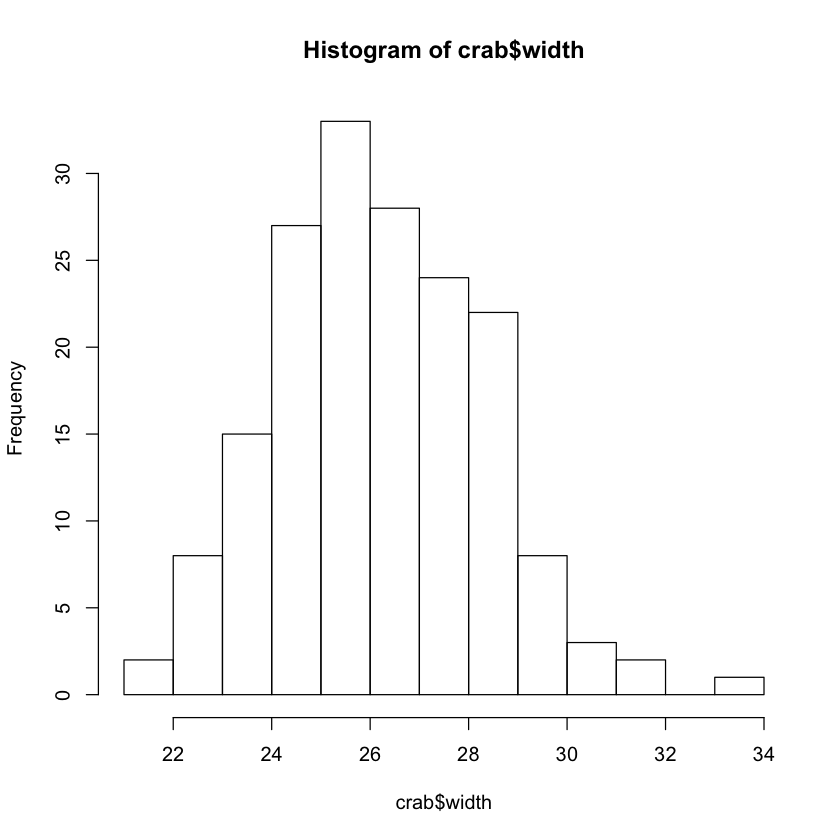

In [11]:
hist(crab$width)

categorize X (width) and plot median of each category of X vs. P(presence of satelite)

In [ ]:
crab.fit <- glm()

## Lung cancer data

In [12]:
lc = read.table("/Users/folder_name/lungcancer.txt",header=T)
lc

,cigarettes,score,cases,controls
1,None,0,7,61
2,< 5,1,55,129
3,5-14,2,489,570
4,15-24,3,475,431
5,25--49,4,293,154
6,50+,5,38,12


In [14]:
lc$pi = lc$cases / (lc$cases + lc$controls)
lc

,cigarettes,score,cases,controls,pi
1,None,0,7,61,0.102941176470588
2,< 5,1,55,129,0.298913043478261
3,5-14,2,489,570,0.461756373937677
4,15-24,3,475,431,0.524282560706402
5,25--49,4,293,154,0.655480984340045
6,50+,5,38,12,0.76


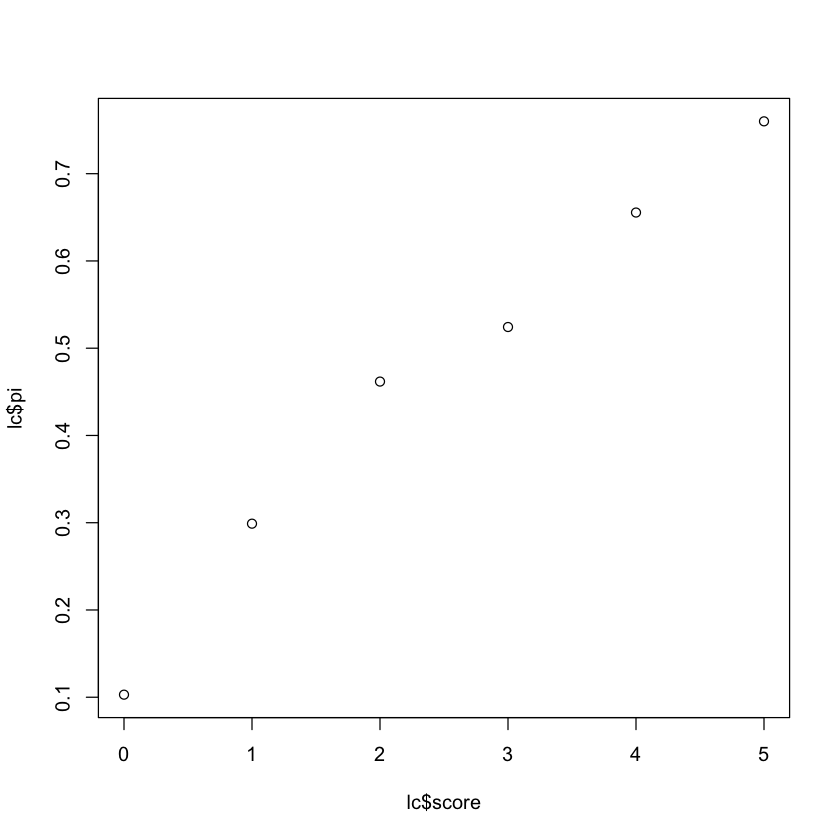

In [16]:
plot(lc$score, lc$pi)

In [22]:
lc.fit <- glm(cbind(cases, controls) ~ score, data=lc, family=binomial())
summary(lc.fit)


Call:
glm(formula = cbind(cases, controls) ~ score, family = binomial(), 
    data = lc)

Deviance Residuals: 
       1         2         3         4         5         6  
-2.69342  -0.65142   2.06914  -1.33595  -0.10204   0.09713  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.21551    0.11646  -10.44   <2e-16 ***
score        0.46722    0.04212   11.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.299  on 5  degrees of freedom
Residual deviance:  13.765  on 4  degrees of freedom
AIC: 52.145

Number of Fisher Scoring iterations: 4


- Except None category in Smoke, it seems to be a linear relationship. 
- Therefore, fit logistic regression. 

- Model : $logit(\pi_{i}) = log(\frac{\pi_{i}}{1-\pi_{i}})= \alpha + \beta x$
- $x$ : scores (0,1,2,3,4,5)
- $Y_i \sim Bin(n_i, \pi_{i})$ 

### 1. Logistic model fitting 

In [23]:
lc1 <- lc[-1,]
lc1
lc.fit1 <- glm(cbind(cases, controls) ~ score, data=lc1, family=binomial())
summary(lc.fit1)

,cigarettes,score,cases,controls,pi
2,< 5,1,55,129,0.298913043478261
3,5-14,2,489,570,0.461756373937677
4,15-24,3,475,431,0.524282560706402
5,25--49,4,293,154,0.655480984340045
6,50+,5,38,12,0.76



Call:
glm(formula = cbind(cases, controls) ~ score, family = binomial(), 
    data = lc1)

Deviance Residuals: 
      2        3        4        5        6  
-1.2248   1.3594  -1.2938   0.3962   0.3917  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.07820    0.12615  -8.547   <2e-16 ***
score        0.42052    0.04516   9.311   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 96.0126  on 4  degrees of freedom
Residual deviance:  5.3323  on 3  degrees of freedom
AIC: 40.013

Number of Fisher Scoring iterations: 3


In [25]:
exp(0.42952)

[1] 1.53652

- Model : $logit(\hat{\pi}_{i}) = \hat{\alpha} + \hat{\beta} x$

- $e^{\hat{\beta}} = e^{0.42952} = 1.52$

- interpretation : the odds of lung cancer increases 52% for each __score increase in smoking of 1 unit__. 

### 2. Test for $H_0 : \beta = 0$

- $LRT = D_{null}- D_{ressid} = -2(L_0 - L_s) - [-2(L_1 - L_s)] = 2(L_1 - L_0)$ $\sim \chi_{1}(\alpha)$

In [35]:
critical_val <- lc.fit1$null.deviance-lc.fit1$deviance
df <- lc.fit1$df.null-lc.fit1$df.residual

critical_val
df

pchisq(critical_val, df, lower.tail=F)  # p-value

[1] 90.68029

[1] 1

[1] 1.688673e-21

- Conclusion : since p-value < 0.05, reject $H_0 : \beta = 0$ and there is an association between X (smoking level) and Y(developing lung cancer).

### 3. GOF test

- GOF test statistic $= D_{residual} = 5.3323 > 3.84 = \chi_{5-2}(0.05) = \chi_{3}(0.05)$

In [37]:
pchisq(lc.fit1$deviance, lc.fit1$df.residual, lower.tail=F)

[1] 0.149017

Since p-value > 0.05, reject $H_0$ : model doesn't fit well. and thus we conclude that this model appears adequate. 